In [1]:
import streamlit as st
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import re

def generateFunctionPoints(coefficients, start=-10, stop=10, step=0.01, showTqdm=True):
    '''
    a*x^3 + b*x^2y + c*xy^2 + d*y^3 + e*x^2 + f*xy + g*y^2 + h*x + i*y + j*1 = 0
    '''
    points = []
    a, b, c, d, e, f, g, h, i ,j = coefficients
    for v in np.arange(start, stop, step):
        yCoefficients = [d, g + c*v, i + b*(v**2)+f*v, j + a*(v**3)+e*(v**2)+h*v]
        xCoefficients = [a, e + b*v, h + c*(v**2)+f*v, j + d*(v**3)+g*(v**2)+i*v]
        for y in cubicSolve(yCoefficients):
            points.append((v,y))
        for x in cubicSolve(xCoefficients):
            points.append((x,v))
    return np.array(points)

def cubicSolve(coefficients):
    '''
    Solves for ax^3+bx^2+cx+d=0
    '''
    polinomial = np.polynomial.Polynomial(coefficients[::-1])
    return [root.real for root in polinomial.roots() if abs(root.imag)<1e-5]

def projectPoints(points):
    proj_alpha = np.arctan2([y for _, y in points], [x for x, _ in points])
    proj_radius = [sqrt(x**2+y**2)/sqrt(x**2+y**2+1) for x, y in points]
    proj_x = np.cos(proj_alpha) * proj_radius
    proj_y = np.sin(proj_alpha) * proj_radius
    return np.array(list(zip(proj_x, proj_y)))

def plotCurve(points, size=1, col='Blue', ax=None):
    return sns.scatterplot(x = points[:,0], y = points[:,1], legend=False,  marker='.', color=col, edgecolor=None, s=size, ax=ax)


def deprojectLine(step = 0.01, radius=1):
    points = np.arange(-radius, radius, step)
    deproj_points = np.tan(np.arcsin(points))
    return np.array(deproj_points + [0])

def generateFunctionOnDeprojectedPoints(coefficients, radius=1, step=0.01, showTqdm=True):
    '''
    a*x^3 + b*x^2y + c*xy^2 + d*y^3 + e*x^2 + f*xy + g*y^2 + h*x + i*y + j*1 = 0
    '''
    points = deprojectLine(step=step, radius=radius)
    validPoints = []
    a, b, c, d, e, f, g, h, i ,j = coefficients
    for v in points:
        yCoefficients = [d, g + c*v, i + b*(v**2)+f*v, j + a*(v**3)+e*(v**2)+h*v]
        xCoefficients = [a, e + b*v, h + c*(v**2)+f*v, j + d*(v**3)+g*(v**2)+i*v]
        for y in cubicSolve(yCoefficients):
            validPoints.append((v,y))
        for x in cubicSolve(xCoefficients):
            validPoints.append((x,v))
        
    return np.array(validPoints)

def parseEquation(equation):
    coeffs = re.search(r'(?:(-?\d*\.*\d+)x\^3)?(?: \+ )?(?:(-?\d*\.*\d+)x\^2y)?(?: \+ )?(?:(-?\d*\.*\d+)xy\^2)?(?: \+ )?(?:(-?\d*\.*\d+)y\^3)?(?: \+ )?(?:(-?\d*\.*\d+)x\^2)?(?: \+ )?(?:(-?\d*\.*\d+)xy)?(?: \+ )?(?:(-?\d*\.*\d+)y\^2)?(?: \+ )?(?:(-?\d*\.*\d+)x)?(?: \+ )?(?:(-?\d*\.*\d+)y)?(?: \+ )?(?:(-?\d*\.*\d+))?', equation)
    return [0 if c is None else float(c) for c in coeffs.groups()]


536


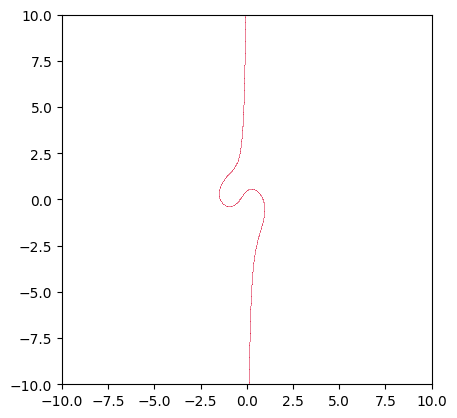

In [8]:
lineSize = 1
step = .05
affineLim = 10

coefficents = parseEquation('1x^3 + 1xy^2 + 1x^2 + -1x + 1y + -.5')
points = generateFunctionPoints(coefficents, step=step)
print(len(points))
plotCurve(points, size = lineSize, col = 'crimson')

plt.gca().set_aspect('equal')

plt.xlim(-affineLim, affineLim)
plt.ylim(-affineLim, affineLim)

plt.show()